In [119]:
%matplotlib notebook

In [157]:

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
from scipy.stats import norm
from numpy import random
import random as r
import numpy as np

In [210]:
def nodes_fitness(n):
    return random.rand(n)

def assign_fitness(g, n):
    fitness = nodes_fitness(n)
    for i in range(n):
        g.nodes[i]['fitness'] = fitness[i]

def get_neighbors(graph: nx.classes.graph.Graph, node):
    neighbors = nx.adjacency_data(graph)['adjacency'][node]
    return [i['id'] for i in neighbors]

def swap_probability(graph: nx.classes.graph.Graph, node):
    fit = graph.nodes[node]['fitness']
    degree = graph.degree[node]
    return (degree+1)*fit

def select_node(graph: nx.classes.graph.Graph, node):
    nodes = list(graph.nodes)
    nodes.remove(node)
    for each_edge in list(graph.edges):
        if each_edge[0] == node:
            nodes.remove(each_edge[1])
        elif each_edge[1] == node:
            nodes.remove(each_edge[0])
    # this node is probability connect to everyone
    if len(nodes) == 0:
        return -1
    fits = {}
    for each in nodes:
        fits[each] = swap_probability(graph,each)
    # most probable neighbor
    return  max(fits, key=fits.get)

def swap_edge(graph: nx.classes.graph.Graph):
    pos = r.randint(0,len(graph.edges)-1)
    edge = list(graph.edges)[pos]
    node = edge[0]
    new_neighbor= select_node(graph, node)
    if new_neighbor == -1:
        swap_edge(graph)
    else:
        graph.remove_edge(*edge)
        graph.add_edge(node, new_neighbor)



In [241]:
min_edge = 10
max_edge = 20
n = 100
m = 500
graph: nx.classes.graph.Graph = nx.dense_gnm_random_graph(n,m)

assign_fitness(graph,n)

fig = plt.figure()

nx.draw_circular(graph, node_size=30)

def animate(frame):
    swap_edge(graph)
    plt.clf()
    plt.cla()
    nx.draw_circular(graph, node_size=30)


ani = FuncAnimation(fig, animate, frames=10000, interval=20)

# plt.show()
ani.save("result6_100_1000.gif")

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.


<IPython.core.display.Javascript object>


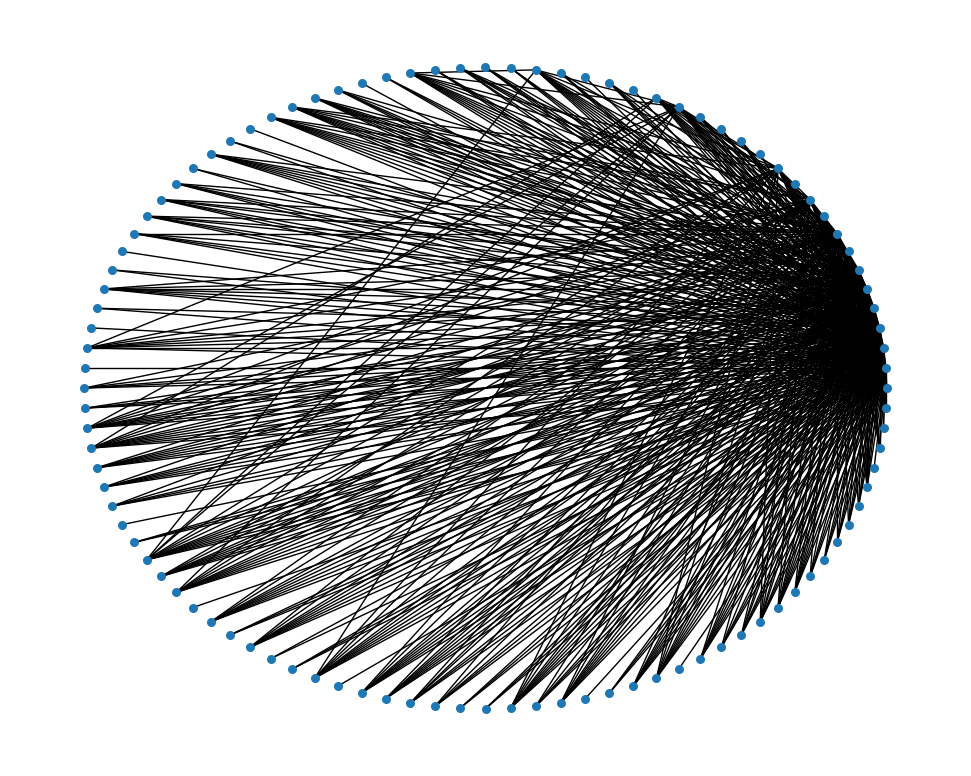

In [244]:
plt.figure()
nx.draw_circular(graph, node_size=30)

In [242]:
# avg degree
# variance
# probability distribution

deg = np.array([each[1] for each in list(graph.degree())])

variance = deg.var()
average = deg.mean()
print(f"variance: {variance} - average: {average}")


# y = 1/average
# xs = np.linspace(deg.min(), deg.max(), 100)
# ys = [y*math.exp(-y*i) for i in xs]

plt.figure()
plt.hist(deg,bins=30)
# plt.plot(xs,ys)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.xscale('linear')
plt.yscale('linear')
plt.show()

variance: 286.76 - average: 10.0


<IPython.core.display.Javascript object>